In [1]:
import numpy as np
import utils
import matplotlib.pyplot as plt
from scipy import interpolate
from RGT_Wheeler import *

In [2]:
def min_max_norm(x):
    x = x - np.min(x)
    x = x / np.max(x)
    return(x)

def Vis_Rgt_Curves(data, curves_num=10):
    rgt_min,rgt_max = np.min(data), np.max(data)
    xx = np.linspace(rgt_max,rgt_min,curves_num)
    rgt_line = np.zeros_like(data)
    for j in range(data.shape[1]):
        for ni in range(curves_num):
            xi_arg = np.argmin(np.abs(data[:,j]-xx[ni]))
            xi_1,xi_2 = np.max((0,xi_arg-2)), np.min((data.shape[0],xi_arg+1))
            if xi_2<=(data.shape[0]-1): # volid the bottom horizons lines
                rgt_line[xi_1:xi_2, j] = xx[ni]
    return rgt_line

## 1.RGT resampling

In [3]:
pred = np.load("./RGT_pred/Beagle_pred.npy")
sx = np.load("./RGT_pred/Beagle_seis.npy")
rgt = rgt_newsampling(pred)
np.save("./RGT_pred/Beagle_rgt_new.npy",rgt)

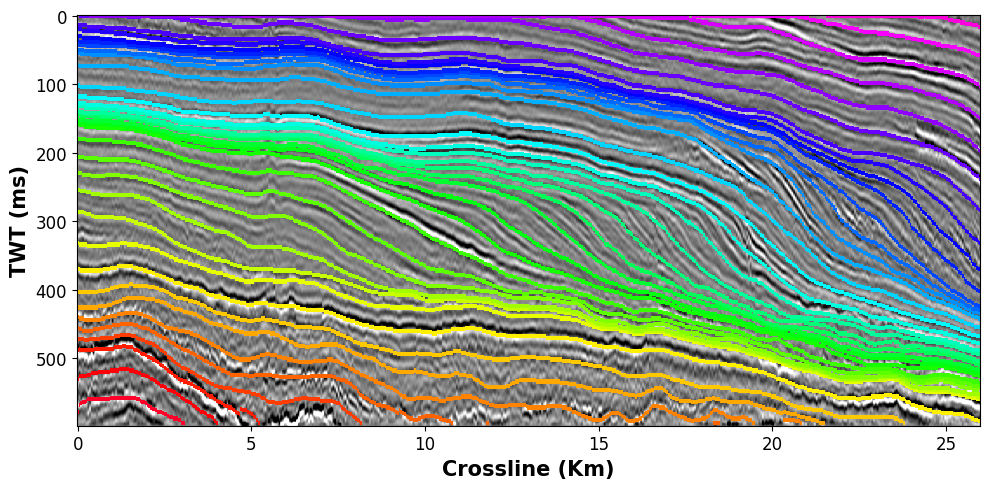

In [4]:
seis = np.load("./RGT_pred/Beagle_seis.npy")
rgt = np.load("./RGT_pred/Beagle_rgt_new.npy")

plt.figure(figsize=(10,5))
# plt.imshow(sx,vmin=-4,vmax=4,cmap="gray",aspect="auto")
# plt.imshow(rgt,cmap=utils.getStrataColors(),aspect="auto")

plt.imshow(seis,vmin=-3,vmax=3,cmap="gray",aspect="auto")
curve = Vis_Rgt_Curves(rgt,curves_num=41)
plt.imshow(curve,cmap=utils.setAlpha("gist_rainbow_r",FillExceptMin=True),interpolation="nearest",aspect="auto")

plt.xticks([0,100,200,300,400,500],[0,5,10,15,20,25],fontsize=12)
plt.xlabel("Crossline (Km)",fontsize=15, fontweight='bold')
plt.yticks([0,50,100,150,200,250],[0,100,200,300,400,500],fontsize=12)
plt.ylabel("TWT (ms)",fontsize=15, fontweight='bold')
# plt.title("turbo",fontsize=30)
plt.tight_layout()

## 2.Wheeler diagram

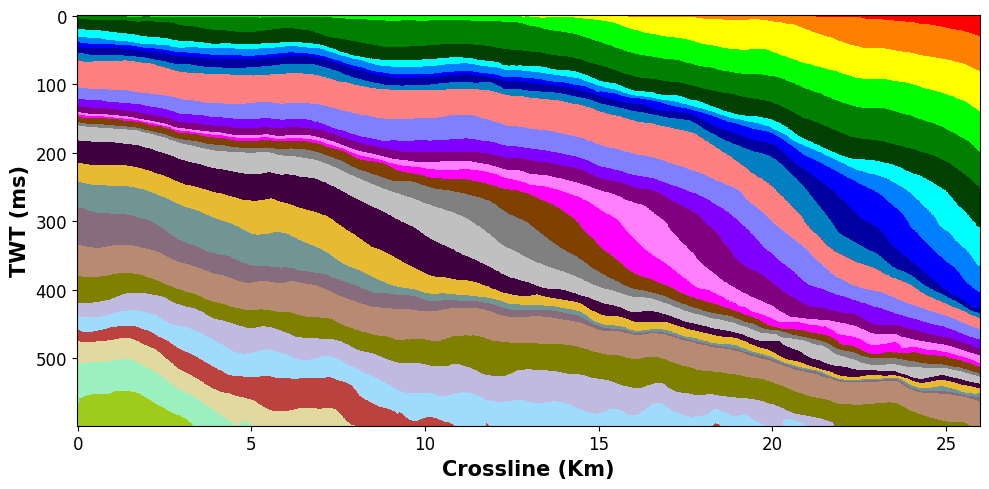

In [5]:
seis = np.load("./RGT_pred/Beagle_seis.npy")
rgt = np.load("./RGT_pred/Beagle_rgt_new.npy")

plt.figure(figsize=(10,5))
# plt.imshow(seis,vmin=-3,vmax=3,cmap="gray",aspect="auto")
plt.imshow(rgt,cmap=utils.getStrataColors(),aspect="auto")

plt.xticks([0,100,200,300,400,500],[0,5,10,15,20,25],fontsize=12)
plt.xlabel("Crossline (Km)",fontsize=15, fontweight='bold')
plt.yticks([0,50,100,150,200,250],[0,100,200,300,400,500],fontsize=12)
plt.ylabel("TWT (ms)",fontsize=15, fontweight='bold')
plt.tight_layout()
# plt.xticks([]),plt.yticks([])


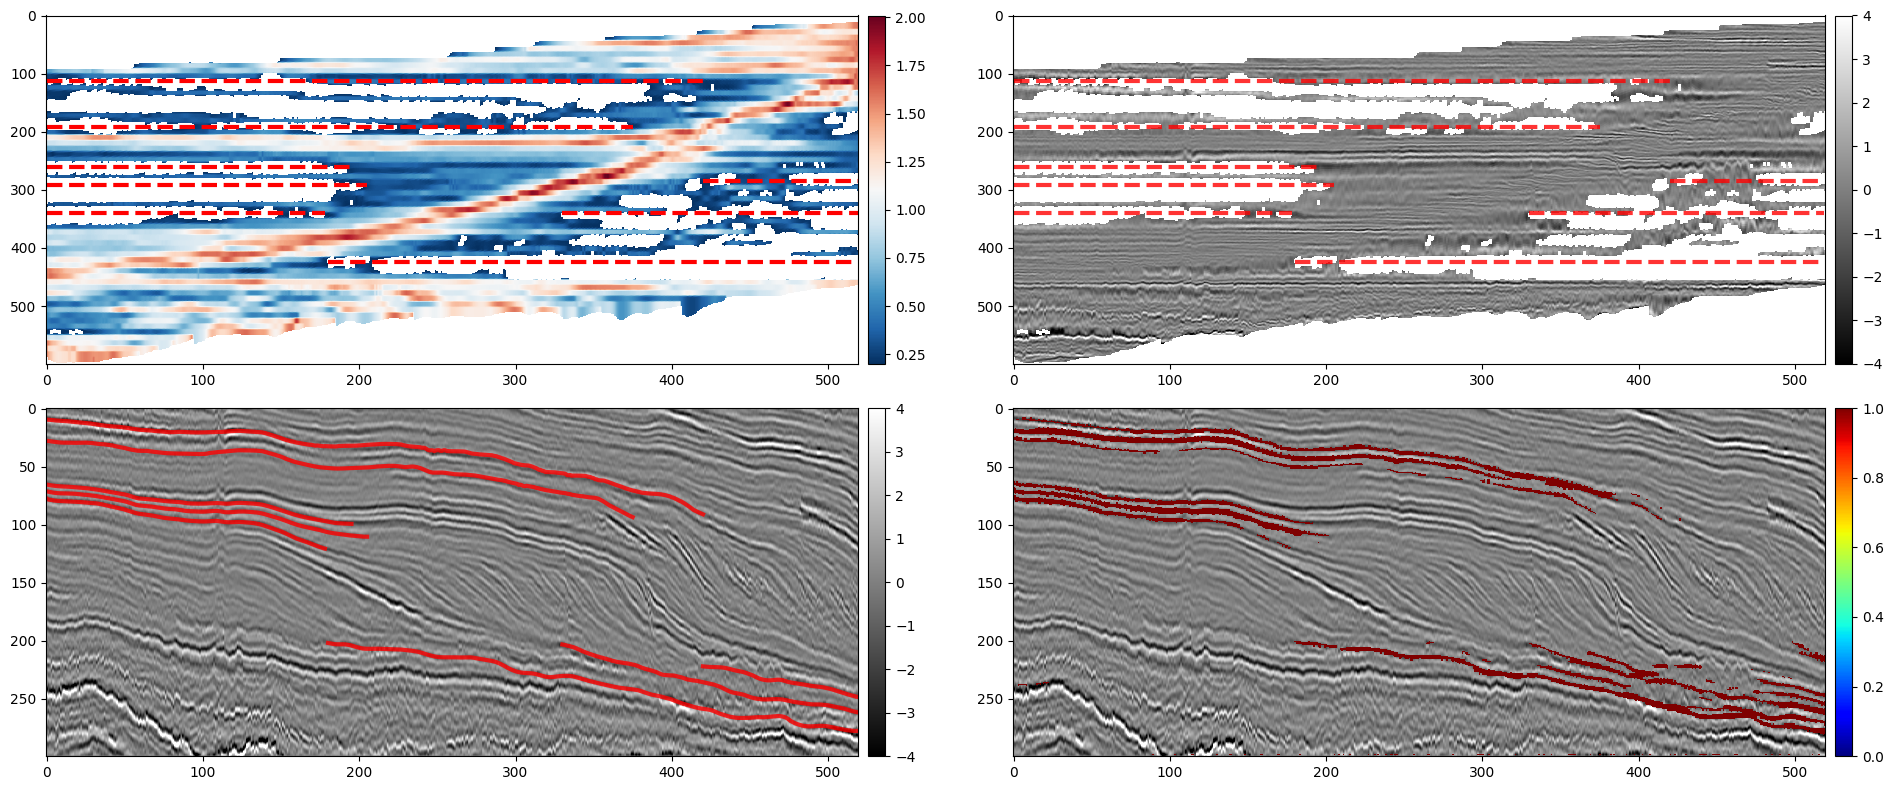

In [6]:
res = 0.2
w_scale = 2

line_points = [[0,178,170],[0,205,146],[0,195,130],[0,375,96],[0,420,56],[180,519,212],[330,519,170],[420,519,142]] # Beagle-500

surfs = build_unconformties(line_points,rgt)
wheeler_strat = build_stratigraphic_wheeler_thickness(rgt,rgt.shape[0]*w_scale,res=res)
flatten_seis = build_flatten_seis(rgt,seis,rgt.shape[0]*w_scale,wheeler_strat,res=res)

plt.figure(figsize=(20,8))
plt.subplot(2,2,1)
plt.imshow(wheeler_strat,cmap="RdBu_r",interpolation="bilinear",aspect="auto")
for x1,y1,_ in surfs:
    plt.plot(x1,y1*w_scale,"--",color="red",linewidth=3)
plt.colorbar(pad=0.01)
plt.subplot(2,2,2)
plt.imshow(flatten_seis,cmap="gray",vmin=-4,vmax=4,interpolation="bilinear",aspect="auto")
for x1,y1,_ in surfs:
    plt.plot(x1,y1*w_scale,"--",color="red",linewidth=3,alpha=0.8)
plt.colorbar(pad=0.01)

plt.subplot(2,2,3)
plt.imshow(seis,vmin=-4,vmax=4,cmap="gray",aspect="auto")
for x1,_,surf1 in surfs:
    plt.plot(x1,surf1,"red",linewidth=3,alpha=0.8)
plt.colorbar(pad=0.01)
plt.subplot(2,2,4)
unconf = build_unconf_volume(rgt,wheeler_strat,w_scale)
plt.imshow(seis,vmin=-4,vmax=4,cmap="gray",aspect="auto")
plt.imshow(unconf,cmap=utils.setAlpha("jet",FillExceptMin=True),interpolation="nearest",aspect="auto")
plt.colorbar(pad=0.01)

plt.tight_layout()

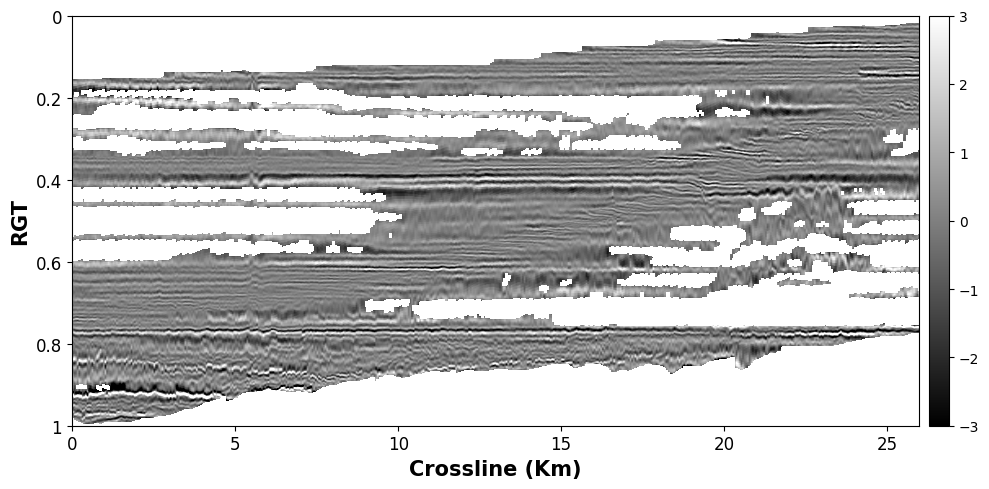

In [7]:
plt.figure(figsize=(11,5))
plt.imshow(flatten_seis,cmap="gray",vmin=-3,vmax=3,interpolation="bilinear",aspect="auto")
plt.colorbar(pad=0.01)
plt.xticks([0,100,200,300,400,500],[0,5,10,15,20,25],fontsize=12)
plt.xlabel("Crossline (Km)",fontsize=15, fontweight='bold')
plt.yticks([i * flatten_seis.shape[0] for i in [0,0.2,0.4,0.6,0.8,1]],[0,0.2,0.4,0.6,0.8,1],fontsize=12)
plt.ylabel("RGT",fontsize=15, fontweight='bold')
plt.tight_layout()

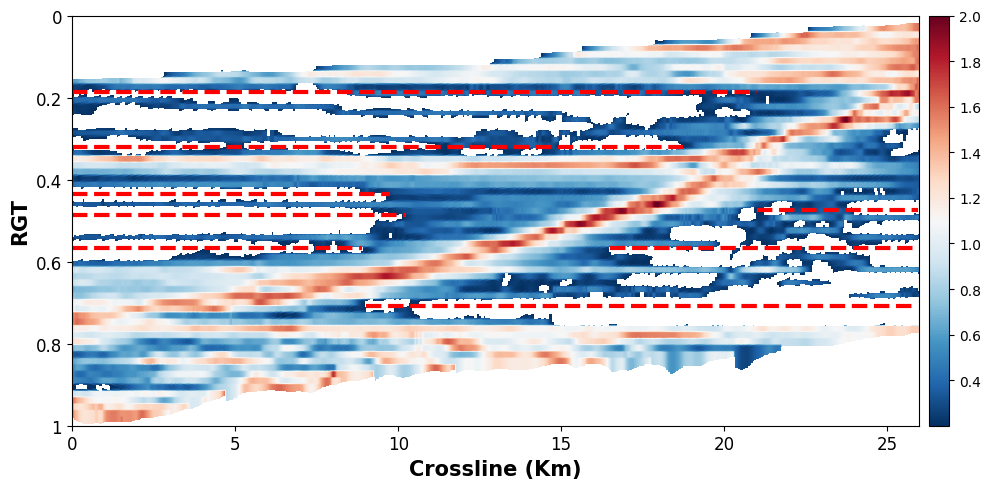

In [8]:
plt.figure(figsize=(11,5))
plt.imshow(wheeler_strat,vmax=2,cmap="RdBu_r",interpolation="bilinear",aspect="auto")
for x1,y1,_ in surfs:
    plt.plot(x1,y1*w_scale,"--",color="red",linewidth=3)
plt.colorbar(pad=0.01)
plt.xticks([0,100,200,300,400],[0,5,10,15,20,],fontsize=12)
plt.xticks([0,100,200,300,400,500],[0,5,10,15,20,25],fontsize=12)
plt.xlabel("Crossline (Km)",fontsize=15, fontweight='bold')
plt.yticks([i * flatten_seis.shape[0] for i in [0,0.2,0.4,0.6,0.8,1]],[0,0.2,0.4,0.6,0.8,1],fontsize=12)
plt.ylabel("RGT",fontsize=15, fontweight='bold')
plt.tight_layout()

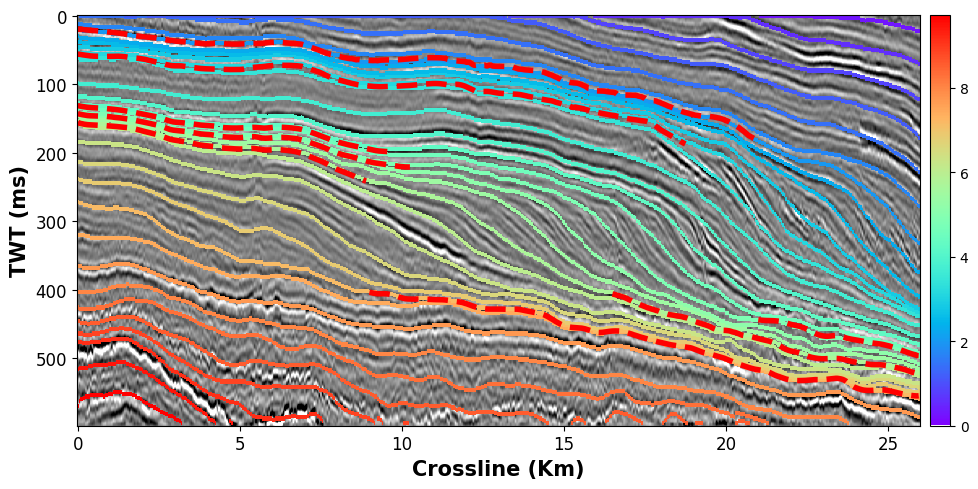

In [9]:
plt.figure(figsize=(11,5))
plt.imshow(seis,vmin=-3,vmax=3,cmap="gray",aspect="auto")
curve = Vis_Rgt_Curves(rgt,curves_num=36) 
plt.imshow(curve,cmap=utils.setAlpha("rainbow",FillExceptMin=True),interpolation="nearest",aspect="auto")

for x1,_,surf1 in surfs:
    plt.plot(x1,surf1,"--",color="red",linewidth=4)
plt.colorbar(pad=0.01)
plt.xticks([0,100,200,300,400,500],[0,5,10,15,20,25],fontsize=12)
plt.xlabel("Crossline (Km)",fontsize=15, fontweight='bold')
plt.yticks([0,50,100,150,200,250],[0,100,200,300,400,500],fontsize=12)
plt.ylabel("TWT (ms)",fontsize=15, fontweight='bold')
plt.tight_layout()